<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> 
Linear Regression (StandardScaler)<BR> Ridge Lasso<BR> Gridsearch<br>Cross Validation**</span><br>


<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [1]:
# Libraries
import pandas as pd
import os # operating system    
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns   


In [2]:
print(os.getcwd()) 

/Users/miguelopez/Desktop/4-Proyecto ML/src/notebooks


<span style="color:green">**Linear Regression**</span>
 <br>

In [3]:
# import scaled_df
df=pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_scaled.csv')

In [4]:
df.tail()

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
9995,1,1,0,3,0,0,2,2,230,1,268,2,5,12,27,9,2,15,2,2408
9996,0,0,2,3,0,0,3,0,234,0,5316,0,3,14,8,24,1,9,9,3084
9997,2,0,3,0,1,2,5,2,298,3,96,0,5,11,5,24,2,8,1,2377
9998,3,1,2,2,0,0,4,1,179,2,8688,2,5,19,14,5,1,5,8,4574
9999,1,1,1,3,3,0,1,2,115,1,9952,3,4,11,6,0,1,11,3,826


In [5]:
#Scaling
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df[numerical] = scaler.fit_transform(df[numerical])

In [6]:
# Split data / convert to numpy array
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 


In [8]:
from sklearn.linear_model import LinearRegression   
model=LinearRegression()
model.fit(X_train,y_train) 
y_pred=model.predict(X_test)    

In [9]:
#  Metrics 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Print metrics
print("Linear Regression Metrics")
print("--------------------------")
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)  
print("RMSE: ", rmse)



Linear Regression Metrics
--------------------------
R2:  0.5510586077867407
MAE:  546.702074104053
MSE:  466610.4057016466
RMSE:  683.0888710128768


RIDGE AND LASSO

In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Assume X and y are the training features and target

# Ridge regression
ridge = Ridge(alpha=10) 
ridge.fit(X, y)
ridge_preds = ridge.predict(X)
ridge_mse = mean_squared_error(y, ridge_preds)

# Lasso regression
lasso = Lasso(alpha=10)
lasso.fit(X, y) 
lasso_preds = lasso.predict(X)
lasso_mse = mean_squared_error(y, lasso_preds)
# Calculate R-squared
ridge_r2 = r2_score(y, ridge_preds)
lasso_r2 = r2_score(y, lasso_preds)

# Calculate MAE
ridge_mae = mean_absolute_error(y, ridge_preds)  
lasso_mae = mean_absolute_error(y, lasso_preds)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
ridge_rmse = mean_squared_error(y, ridge_preds, squared=False)
lasso_rmse = mean_squared_error(y, lasso_preds, squared=False)


print("Ridge and Lasso Regression")
print("---------------------------")
print('Ridge R-squared:', ridge_r2)
print('Lasso R-squared:', lasso_r2) 

print('Ridge MAE:', ridge_mae)
print('Lasso MAE:', lasso_mae)

print('Ridge RMSE:', ridge_rmse)
print('Lasso RMSE:', lasso_rmse)




print('Ridge MSE:', ridge_mse) 
print('Lasso MSE:', lasso_mse)

Ridge and Lasso Regression
---------------------------
Ridge R-squared: 0.5563038107573735
Lasso R-squared: 0.5543904078271111
Ridge MAE: 540.1057611521613
Lasso MAE: 540.1751314207003
Ridge RMSE: 677.8449184188424
Lasso RMSE: 679.304921006881
Ridge MSE: 459473.7334262472
Lasso MSE: 461455.17570416495


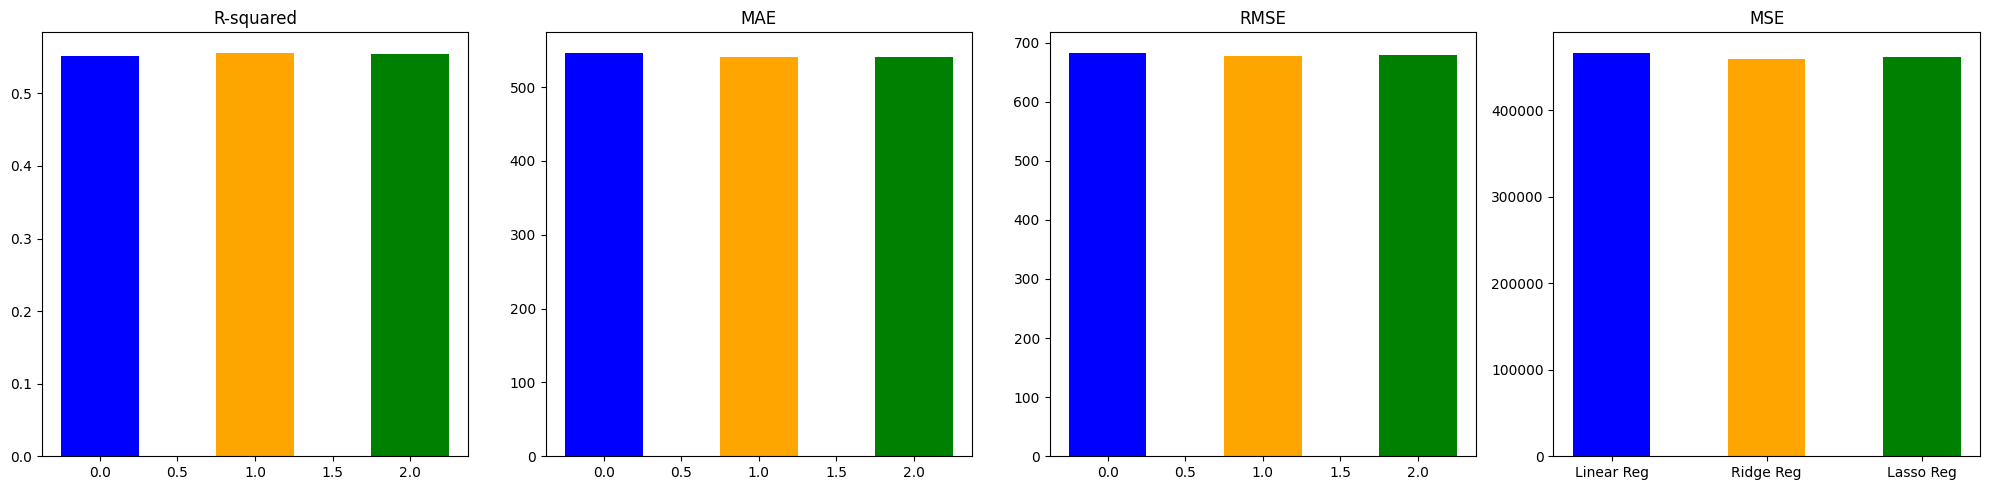

In [11]:
# Colors  
colors = ['blue', 'orange', 'green']

# plots
fig, axs = plt.subplots(1, 4, figsize=(20,5)) 
axs[3].bar([0,1,2], [mse, ridge_mse, lasso_mse], width=0.5, color=colors)
axs[3].set_xticks([0,1,2])
axs[3].set_xticklabels(['Linear Reg', 'Ridge Reg', 'Lasso Reg'])
axs[3].set_title('MSE')

# R-squared
axs[0].bar([0,1,2], [r2, ridge_r2, lasso_r2], width=0.5, color=colors)
axs[0].set_title('R-squared')
# MAE
axs[1].bar([0,1,2], [mae, ridge_mae, lasso_mae], width=0.5, color=colors) 
axs[1].set_title('MAE')
# RMSE
axs[2].bar([0,1,2], [rmse, ridge_rmse, lasso_rmse], width=0.5, color=colors)
axs[2].set_title('RMSE')

plt.tight_layout()
plt.show()

TUNNING GRIDSEARCH

In [12]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {'alpha': [0.1, 1, 10, 100, 1000]}

gs = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
gs.fit(X_train, y_train)

print("Best parameters:", gs.best_params_)
print("Best score ridge MSE gridsearch:", gs.best_score_)

best_ridge = gs.best_estimator_
ridge_preds = best_ridge.predict(X_test)

Best parameters: {'alpha': 10}
Best score ridge MSE gridsearch: -460876.76642206125


CROSS VALIDATION

In [13]:
from sklearn.model_selection import cross_val_score

cross_val = LinearRegression()

# Perform 5-fold cross validation
cv_scores = cross_val_score(cross_val, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score: ", cv_scores.mean())
print("R-squared of cross-validation score: ", np.mean(cv_scores)**2)   
print("rmse of cross-validation score: ", np.sqrt(np.mean(cv_scores)))
print("mse of cross-validation score: ", np.mean(cv_scores))    



Cross-validation scores: [0.52477419 0.58313746 0.57090846 0.53234366 0.54742185]
Average cross-validation score:  0.5517171238996029
R-squared of cross-validation score:  0.3043917848040498
rmse of cross-validation score:  0.7427766312287988
mse of cross-validation score:  0.5517171238996029


<!-- gridsearch / validacion cruzada -->

Baseline Linear Regression:

MSE: 456815

Ridge Regression (alpha = 10):

Best MSE: -462436
Best Score: -462436
